In [1]:
from modules import *

# 日频策略回测

## 使用DataEngine完成数据预处理

In [2]:
data_engine = DailyDataEngine()
data_engine.load_data()
data_engine.preprocess_data()

In [3]:
stk_fin_annotation = data_engine.get_data("stk_fin_annotation")
stk_fin_annotation.head(2)

,stk_id,date,NONRECURRING_19,NONRECURRING_1,NONRECURRING_2,NONRECURRING_3,NONRECURRING_4,NONRECURRING_5,NONRECURRING_6,NONRECURRING_7,...,NONRECURRING_22,NONRECURRING_24,NONRECURRING_25,NONRECURRING_14,NONRECURRING_15,NONRECURRING_16,NONRECURRING_17,NONRECURRING_18,adj,publish_date
0,000001.SZ,2020-03-31,42000000.0,50000000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,54000000.0,-12000000.0,NaN,0,2020-04-21
1,000001.SZ,2020-06-30,92000000.0,76000000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,119000000.0,-27000000.0,NaN,0,2020-08-28


In [4]:
stk_daily = data_engine.get_data("stk_daily")
stk_daily.head(2)

,stk_id,date,open,high,low,close,volume,amount,cumadj
0,000001.SZ,2020-01-02,16.65,16.95,16.55,16.87,153023008.0,2.571200e+09,98.0986
1,000001.SZ,2020-01-03,16.94,17.31,16.92,17.18,111619000.0,1.914500e+09,98.0986


## 使用ComputEngine完成内置因子计算

In [5]:
compute_engine_annotation = DailyComputeEngine(stk_fin_annotation, data_type="stk_fin_annotation")
annotation_factors = compute_engine_annotation.compute_factors() 
annotation_factors.head(2)

,stk_id,date,NONRECURRING_19,NONRECURRING_1,NONRECURRING_2,NONRECURRING_3,NONRECURRING_4,NONRECURRING_5,NONRECURRING_6,NONRECURRING_7,...,NONRECURRING_24,NONRECURRING_25,NONRECURRING_14,NONRECURRING_15,NONRECURRING_16,NONRECURRING_17,NONRECURRING_18,adj,publish_date,nonrecurring_total
0,000001.SZ,2020-03-31,42000000.0,50000000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54000000.0,-12000000.0,NaN,0,2020-04-21,134000000.0
1,000001.SZ,2020-06-30,92000000.0,76000000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,119000000.0,-27000000.0,NaN,0,2020-08-28,260000000.0


In [6]:
compute_engine_stk_daily = DailyComputeEngine(stk_daily, data_type="stk_daily")
stk_daily_factors = compute_engine_stk_daily.compute_factors()
daily_factors = stk_daily_factors.copy()
stk_daily_factors.head(2)

stk_id       date   open   high    low  close       volume  \
stk_id                                                                       
000001.SZ 0  000001.SZ 2020-01-02  16.65  16.95  16.55  16.87  153023008.0   
          1  000001.SZ 2020-01-03  16.94  17.31  16.92  17.18  111619000.0   

                   amount   cumadj  reversal_5d  reversal_10d  reversal_15d  \
stk_id                                                                        
000001.SZ 0  2.571200e+09  98.0986          NaN           NaN           NaN   
          1  1.914500e+09  98.0986          NaN           NaN           NaN   

             reversal_30d    return  
stk_id                               
000001.SZ 0           NaN       NaN  
          1           NaN  0.018376

## 使用Strategy与BacktestEngine完成回测
### Reversal策略

In [7]:
stk_daily_factors['signal'] = stk_daily_factors['reversal_5d']
strategy = Strategy(stk_daily_factors, 'Reversal')
signal_df = strategy.generate_signals()

In [8]:
backtestEngine = BacktestEngine(signal_df)
backtestEngine.set_date('2020-01-02','2021-12-31')
result = backtestEngine.backtest(consider_commission=False, consider_slippage=False)
result.head(2)

,stk_id,date,buy_sell,return,factor,effective_signal,strategy_return,cumulative_return
0,000001.SZ,2020-01-02,-1.0,NaN,NaN,NaN,0.000000,0.000000
1,000001.SZ,2020-01-03,-1.0,0.018376,NaN,-1.0,-0.018376,-0.018376


### 回测结果展示

In [9]:
summarize_backtest_result_by_stock(result)

,stk_id,excess_return,annualized_return,annualized_volatility,sharpe_ratio,max_drawdown
0,000001.SZ,0.140682,0.216999,0.369306,0.490261,-inf
1,000002.SZ,0.117362,-0.078840,0.347023,-0.305669,-1.031330
2,000004.SZ,0.298905,0.487080,0.587664,0.754166,-29.254526
3,000005.SZ,0.050982,-0.044976,0.359927,-0.203397,-0.800229
4,000006.SZ,0.144309,0.122403,0.376105,0.237284,-0.895250
...,...,...,...,...,...,...
4718,871396.BJ,-0.435890,0.318607,0.795020,0.351785,0.000000
4719,871553.BJ,-0.846747,-0.219012,0.775450,-0.312228,0.000000
4720,871642.BJ,-0.664668,0.415009,0.898647,0.415339,0.000000
4721,871981.BJ,-1.099793,7.288678,3.020144,2.332906,0.000000


In [10]:
summarize_backtest_result_average(result)

{'excess_return': -0.1960123280544968,
 'annualized_return': 8.906687824232449e+118,
 'annualized_volatility': 0.6770882546972643,
 'sharpe_ratio': 1.2224463321308245e+116,
 'max_drawdown': -inf}

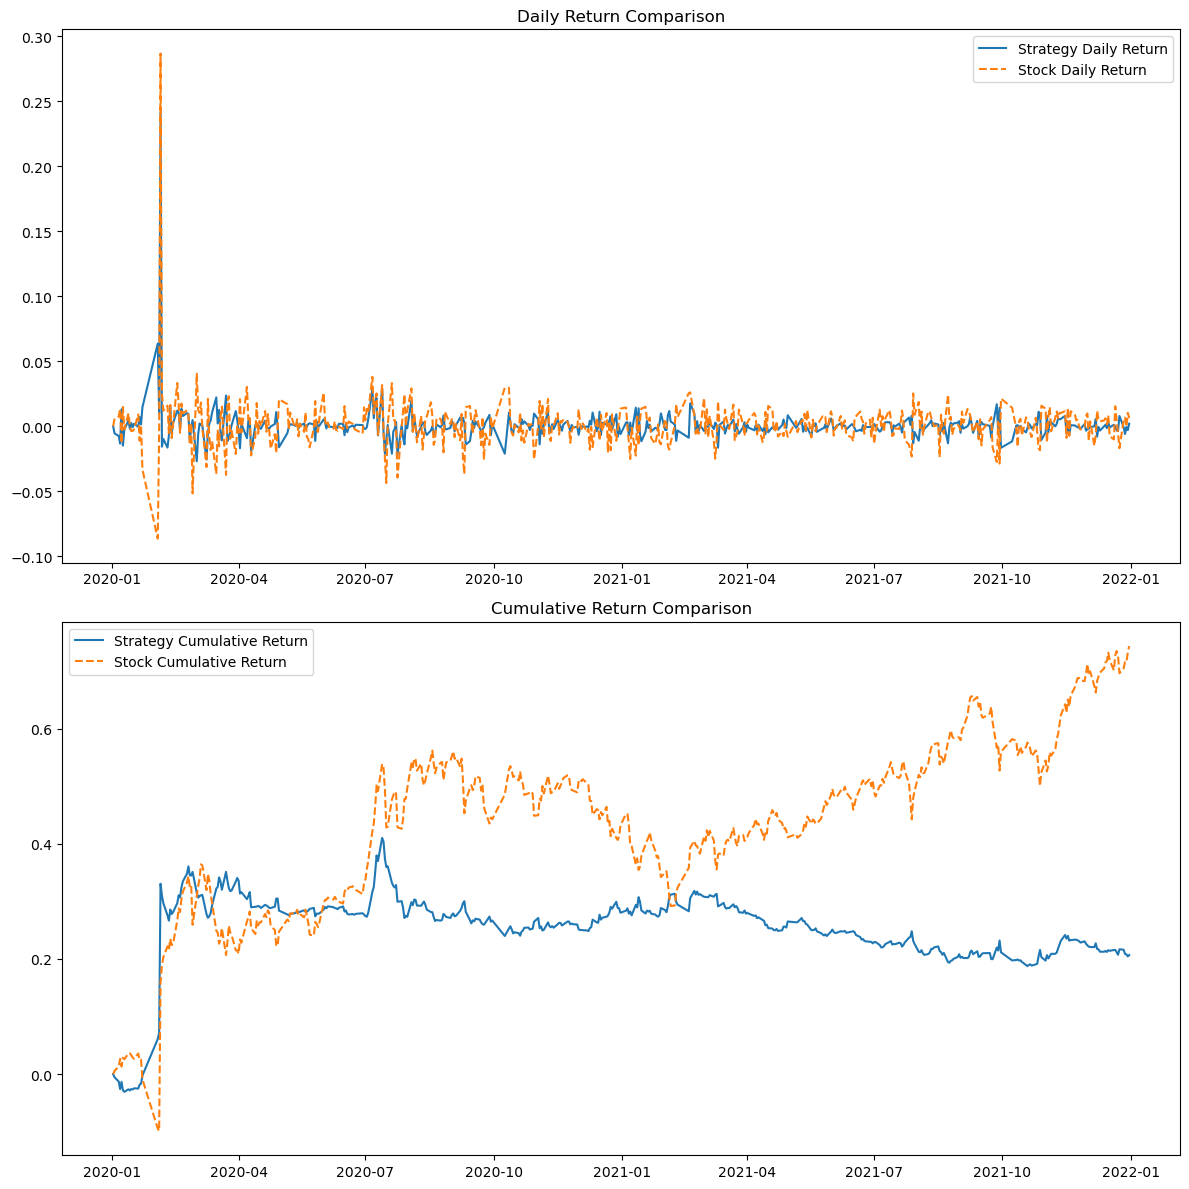

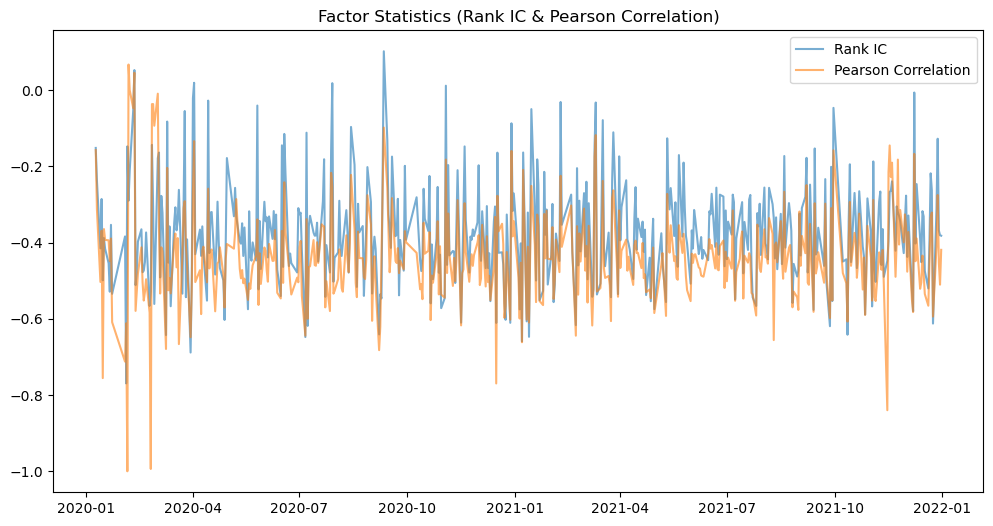

In [11]:
generate_visualizations(result)

### Bearish_Engulfing策略

In [12]:
selected_stocks = ['000001.SZ', '000002.SZ']
filtered_factors = daily_factors.loc[selected_stocks]
strategy = Strategy(filtered_factors, 'Bearish_Engulfing')
signal_df = strategy.generate_signals()

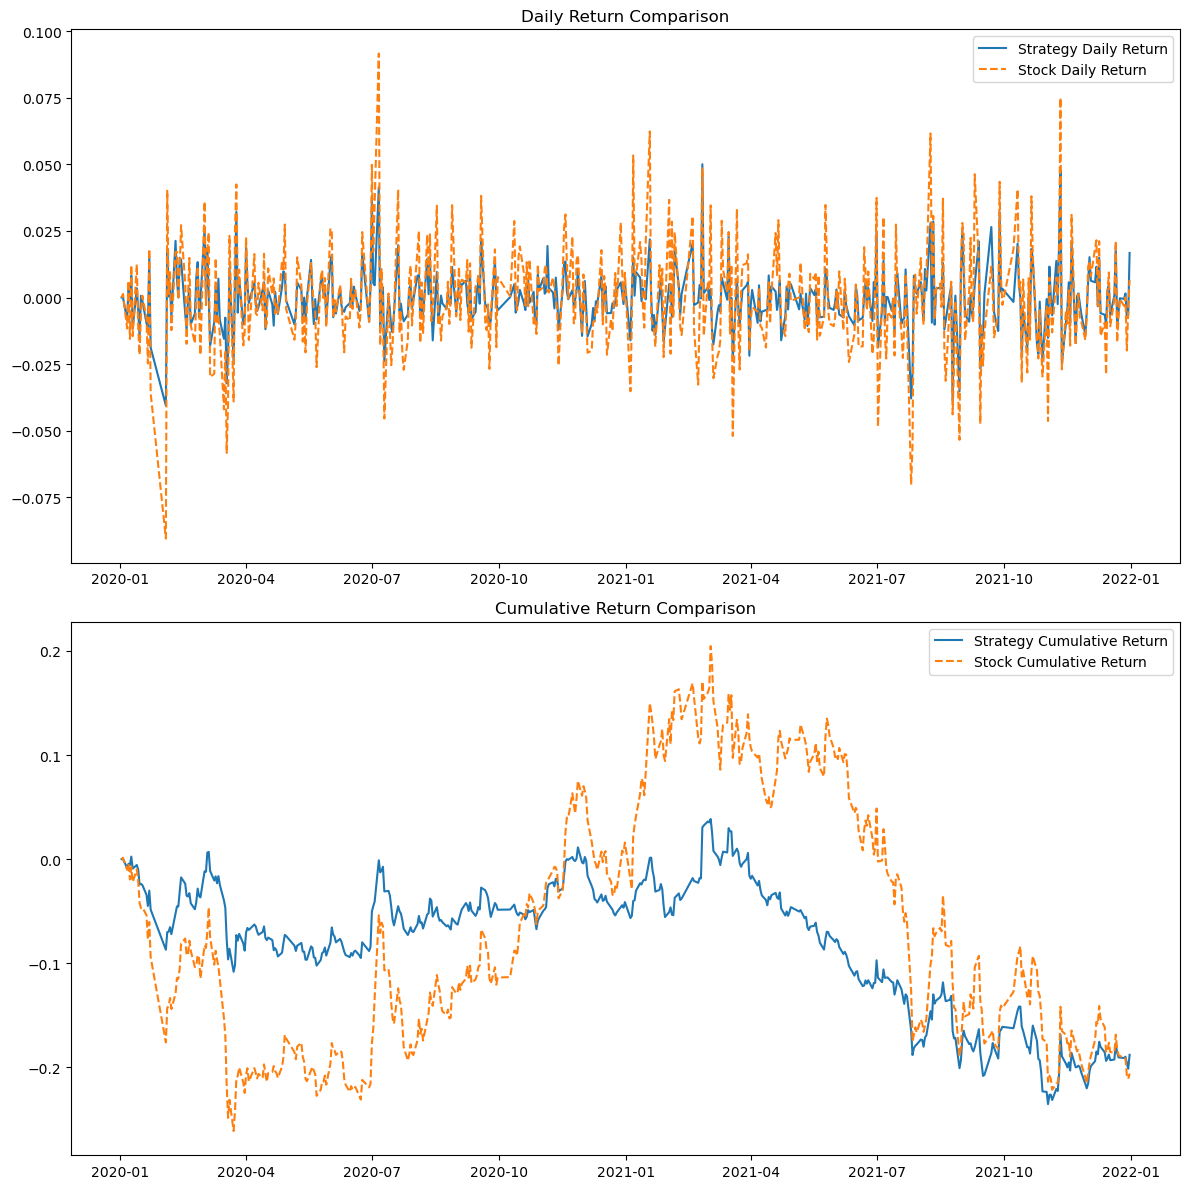

In [16]:
backtestEngine = BacktestEngine(signal_df)
backtestEngine.set_date('2020-01-02','2021-12-31')
result = backtestEngine.backtest(consider_commission=False, consider_slippage=False)
plot_overall_strategy_return(result)

# 高频策略回测

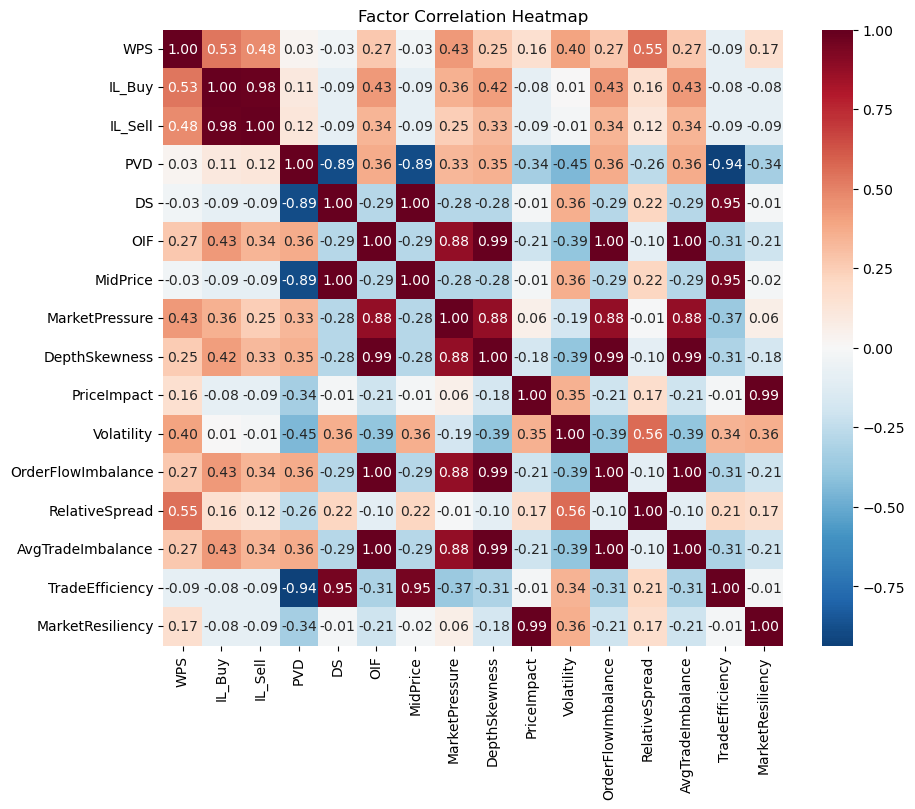

In [14]:
hft_generate_heatmap()

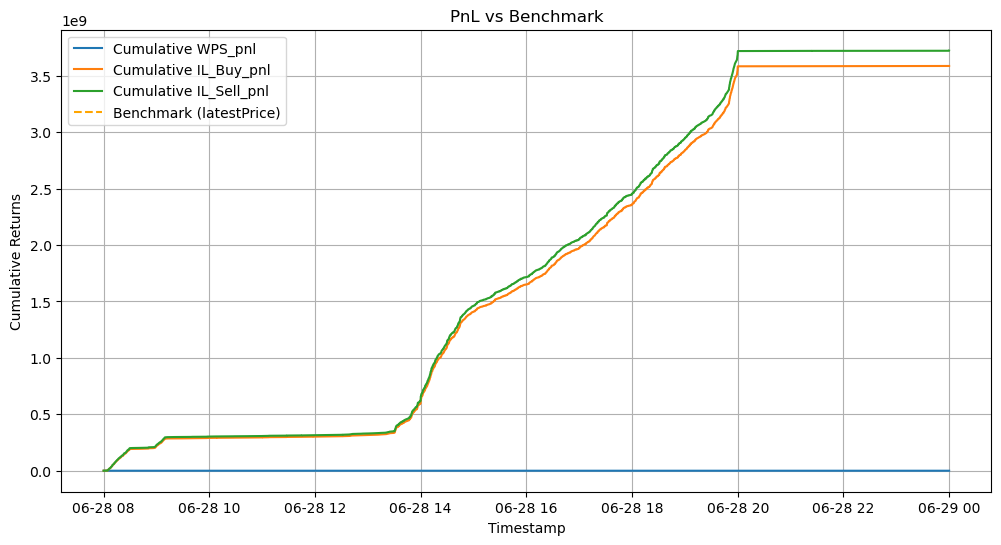

In [15]:
factor_df = pd.read_parquet('generated_factors/solo/1_factor.parquet')
strategy = HFTStrategy()
signals_df = strategy.generate_signals(factor_df)
# super_factor_signals_df = strategy.generate_super_factor_signals(super_factor_df)

# 回测引擎：运行回测
backtest_engine = HFTBacktestEngine(strategy)
backtest_engine.run_backtest()
hft_plot_pnl("backtest_result.parquet")